In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
np.random.seed(42) #set the seed
random_numbers = np.random.uniform(-1, 1, (1000, 2))

In [94]:
random_numbers.shape

(1000, 2)

In [95]:
x1_train = random_numbers[:, 0]
x2_train = x1_train ** 2
y_train = random_numbers[:, 1]

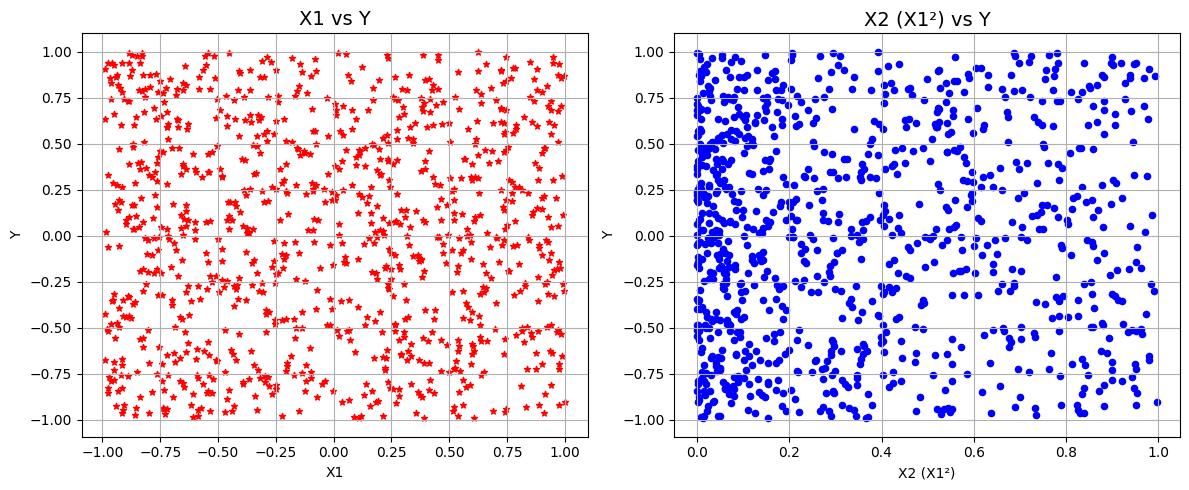

In [96]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

ax[0].scatter(x1_train, y_train, marker = '*', color = 'r', s=20)
ax[0].set_title('X1 vs Y', fontsize=14)
ax[0].set_xlabel('X1')
ax[0].set_ylabel('Y')
ax[0].grid(True)

ax[1].scatter(x2_train, y_train, marker = 'o', color = 'b', s=20)
ax[1].set_title('X2 (X1²) vs Y', fontsize=14)
ax[1].set_xlabel('X2 (X1²)')
ax[1].set_ylabel('Y')
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [97]:
X = np.column_stack((x1_train, x2_train)) # X matrix

In [124]:
w_init = np.array([0.5, 0.5])
b_init = 0.5

In [144]:
def LinearEquation(X, w, b) :
  m = X.shape[0]
  f_wb = np.zeros(m)

  for i in range(m) :
    f_wb[i] = np.dot(X[i], w) + b

  return f_wb

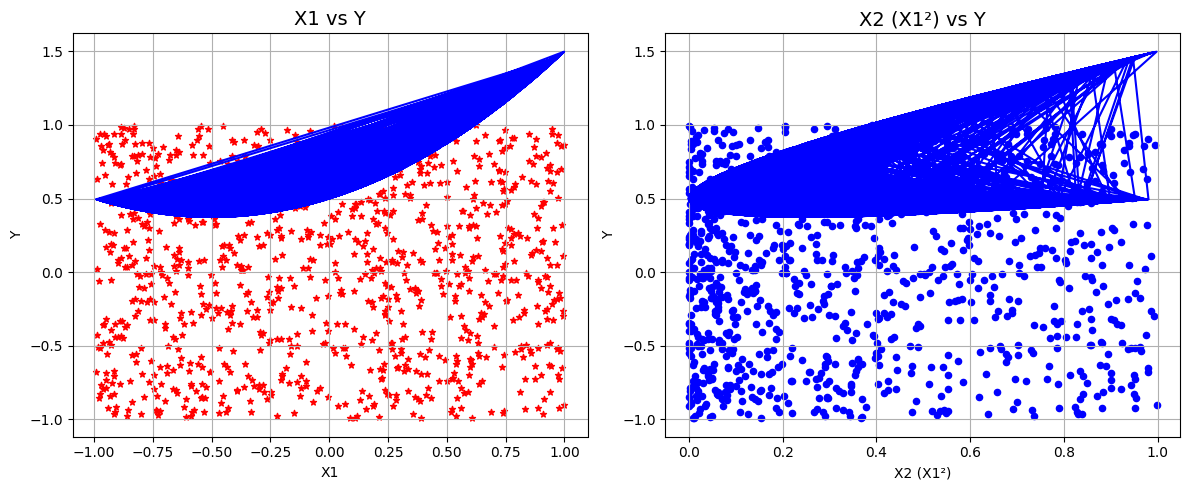

In [145]:
y_pred = LinearEquation(X, w_init, b_init)

fig, ax = plt.subplots(1, 2, figsize = (12, 5))

ax[0].plot(X[:, 0], y_pred, c='b', label='Our prediction')
ax[0].scatter(x1_train, y_train, marker = '*', color = 'r', s=20)
ax[0].set_title('X1 vs Y', fontsize=14)
ax[0].set_xlabel('X1')
ax[0].set_ylabel('Y')
ax[0].grid(True)

ax[1].plot(X[:, 1], y_pred, c='b', label='Our prediction')
ax[1].scatter(x2_train, y_train, marker = 'o', color = 'b', s=20)
ax[1].set_title('X2 (X1²) vs Y', fontsize=14)
ax[1].set_xlabel('X2 (X1²)')
ax[1].set_ylabel('Y')
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [146]:
def cost_function(X, y_train, w, b) :
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y_train[i])**2
    cost = cost / (2 * m)
    return cost

In [147]:
y_cost = cost_function(X, y_train, w_init, b_init)
print(f"total_error : {y_cost}")

total_error : 0.4255383455059581


In [155]:
def compute_gradient(X, y_train, w, b):
    m_sample = X.shape[0]
    n_feature = X.shape[1]
    dj_dw = np.zeros((n_feature,))
    dj_db = 0.

    for i in range(m_sample):
        err = (np.dot(X[i], w) + b) - y_train[i]

        for j in range(n_feature):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m_sample
    dj_db = dj_db / m_sample

    return dj_db, dj_dw

In [159]:
b_value, w_value = compute_gradient(X, y_train, w_init, b_init)
print(f'value of b : {b_value}')
print(f'value of w : {w_value}')

value of b : 0.6507002965453187
value of w : [0.15815484 0.26967862]


In [184]:
def gradient_descent(X, y_train, w_in, b_in, cost_function, gradient_function, learning_rate, iteration):

    J_history = []
    p_history = []
    w = w_init
    b = b_in

    for i in range(iteration):

        dj_db,dj_dw = gradient_function(X, y_train, w, b)

        # Update Parameters w, b
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db

        # Save cost J at each iteration
        J_history.append( cost_function(X, y_train, w, b))
        p_history.append([w,b])

    return w, b, J_history,  p_history

In [192]:
# initialize parameters
w_initial = 0
b_initial = 0
# some gradient descent settings
iterations = 1000
alpha = 0.7
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X, y_train, w_initial, b_initial,
                                                    cost_function, compute_gradient,
                                                    alpha, iterations)
print(f"value of w : {w_final}")
print(f"value of b : {b_final}")

value of w : [0.00530203 0.04865584]
value of b : -0.0005735172848055168


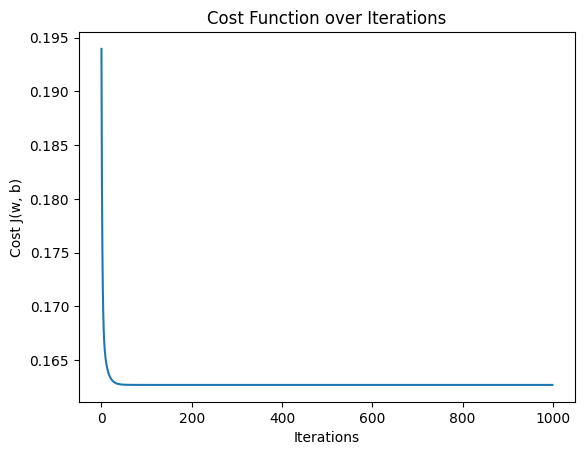

In [190]:

# The cost function J(w,b) should decrease and stabilize.
plt.plot(J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost J(w, b)')
plt.title('Cost Function over Iterations')
plt.show()

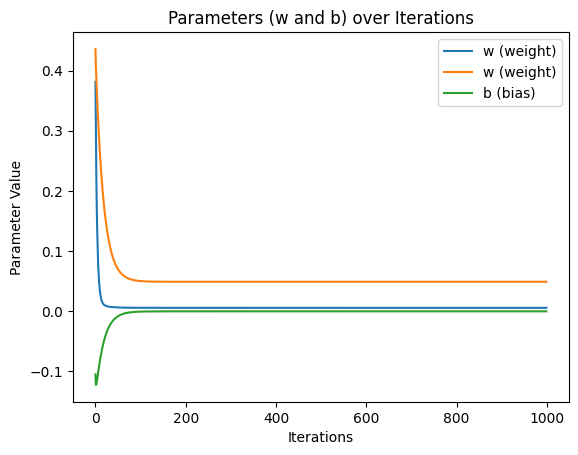

In [194]:
w_history = [p[0] for p in p_hist] # Value of w at iteration i
b_history = [p[1] for p in p_hist] # Value of b at iteration i

plt.plot(w_history, label='w (weight)')
plt.plot(b_history, label='b (bias)')
plt.xlabel('Iterations')
plt.ylabel('Parameter Value')
plt.title('Parameters (w and b) over Iterations')
plt.legend()
plt.show()